# Regression Examples

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pylab as plt

from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.stats.diagnostic as ssd
from statsmodels.stats.diagnostic import het_breushpagan
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [17]:
%matplotlib inline

# Regression with synthetic data

$$y = x'\beta + \epsilon$$

Generate data

In [18]:
X = np.random.rand(1000, 3)
X = sm.add_constant(X)
X[:5,:]

array([[ 1.        ,  0.33636029,  0.68210504,  0.31410517],
       [ 1.        ,  0.21758356,  0.44761984,  0.51980047],
       [ 1.        ,  0.90346553,  0.19882749,  0.91019368],
       [ 1.        ,  0.32156832,  0.7146743 ,  0.36000128],
       [ 1.        ,  0.01826856,  0.73047542,  0.8899261 ]])

In [19]:
beta = np.matrix([1,1,1,1]).transpose()

In [20]:
sd_epsilon = 1.0
epsilon = sd_epsilon * np.random.randn(1000,1)

In [21]:
eps_het = np.square(0.1 * X[:,2]) * np.random.randn(1, 1000)
eps_het = eps_het.transpose()

##  Generating outcome

* Use `epsilon` to generate data without heteroscedasticity (i.e., homoscedasticity)
* Use `eps_het` to generate data with heteroscedasticity

In [22]:
Y = X.dot(beta) + eps_het # + epsilon

In [23]:
all_raw = np.hstack((Y,X))

In [24]:
df = pd.DataFrame(all_raw, columns=['y', 'const', 'x1', 'x2', 'x3'])

/Users/elliotcohen/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/Users/elliotcohen/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


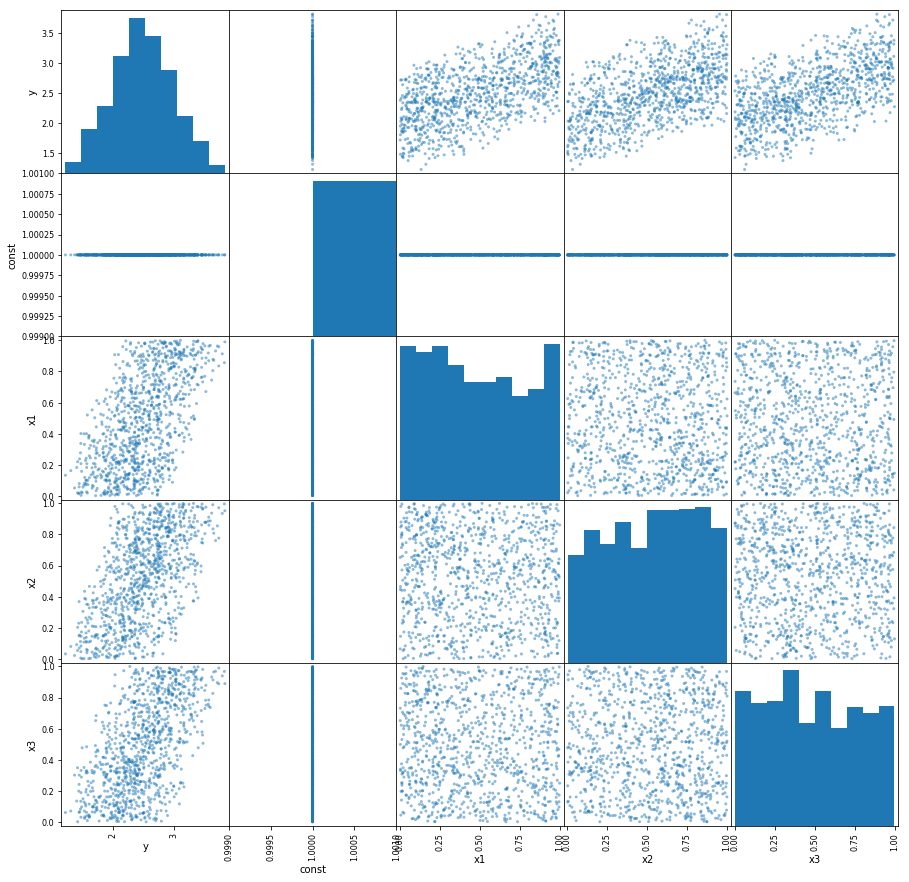

In [25]:
scatter_matrix(df, figsize=(15,15));

In [26]:
results = smf.ols('y ~ x1 + x2 + x3', data=df).fit()

In [27]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     1.000     
Dependent Variable: y                AIC:                -7873.7738
Date:               2017-11-13 15:59 BIC:                -7854.1428
No. Observations:   1000             Log-Likelihood:     3940.9    
Df Model:           3                F-statistic:        3.611e+06 
Df Residuals:       996              Prob (F-statistic): 0.00      
R-squared:          1.000            Scale:              2.2195e-05
---------------------------------------------------------------------
             Coef.    Std.Err.       t       P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept    1.0004     0.0005   2094.8650   0.0000   0.9994   1.0013
x1           1.0003     0.0005   1998.0338   0.0000   0.9993   1.0013
x2           1.0001     0.0005   1902.1534   0.0000   0.9991   1.0011
x3           0.9990     0.0005   1940.7592   0.0000   0.9979   1.0000
-------------------------------------------------------------------
Omnibus:               98.396       Durbin-Watson:          1.981  
Prob(Omnibus):         0.000        Jarque-Bera (JB):       617.997
Skew:                  0.150        Prob(JB):               0.000  
Kurtosis:              6.840        Condition No.:          6      
===================================================================

"""

# Residuals: normality

In [28]:
resid_stud = results.outlier_test()['student_resid']

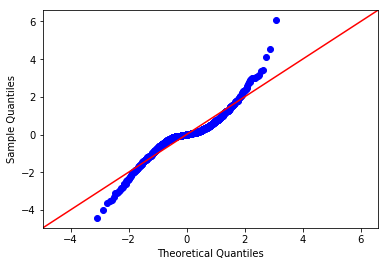

In [29]:
dev_null = sm.graphics.qqplot(resid_stud, line='45', fit=True)

# Residuals: heteroscedasticity

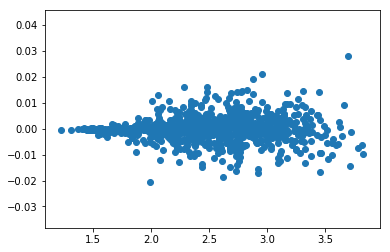

In [30]:
plt.scatter(results.fittedvalues, results.resid)

In [31]:
results.condition_number

6.2859225696964378

## Robust standard errors

If there is heteroscedasticity, you must use robust errors for hypothesis testing because the default standard errors are incorrect (too small).  Consequently, we obtain the robust standard errors and display them.

In [32]:
robust_results = results.get_robustcov_results()
robust_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     1.000     
Dependent Variable: y                AIC:                -7873.7738
Date:               2017-11-13 15:59 BIC:                -7854.1428
No. Observations:   1000             Log-Likelihood:     3940.9    
Df Model:           3                F-statistic:        3.041e+06 
Df Residuals:       996              Prob (F-statistic): 0.00      
R-squared:          1.000            Scale:              2.2195e-05
---------------------------------------------------------------------
             Coef.    Std.Err.       t       P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept    1.0004     0.0004   2318.7014   0.0000   0.9995   1.0012
x1           1.0003     0.0005   1941.8259   0.0000   0.9993   1.0013
x2           1.0001     0.0006   1649.9657   0.0000   0.9989   1.0013
x3           0.9990     0.0005   1849.0392   0.0000   0.9979   1.0000
-------------------------------------------------------------------
Omnibus:               98.396       Durbin-Watson:          1.981  
Prob(Omnibus):         0.000        Jarque-Bera (JB):       617.997
Skew:                  0.150        Prob(JB):               0.000  
Kurtosis:              6.840        Condition No.:          6      
===================================================================

"""

Breusch-Pagan test returns: LM stat, LM p-value, F stat, F p-value

$$H_0: no\ heteroscedasticity$$

In [33]:
het_breushpagan(results.resid, results.model.exog)

/Users/elliotcohen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


(183.89521640801775,
 1.2712444892450082e-39,
 74.810506046470991,
 1.2163824761474677e-43)

In [34]:
het_goldfeldquandt(results.resid, results.model.exog)

(1.1070814555019919, 0.12882312857216849, 'increasing')

# Outliers

In [37]:
results.outlier_test()
x = results.get_influence()
print (x.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0      2.324      2.333      0.002     -1.947      0.002     -0.084     -1.950     -0.084
         1      2.184      2.185      0.000     -0.300      0.002     -0.013     -0.299     -0.013
         2      3.013      3.012      0.000      0.183      0.006      0.015      0.183      0.015
         3      2.395      2.396      0.000     -0.335      0.002     -0.015     -0.335     -0.015
         4      2.643      2.638      0.001      0.987      0.006      0.074      0.987      0.074
         5      1.613      1.614      0.000     -0.109      0.005     -0.008     -0.109     -0.008
         6      2.039      2.040      0.000     -0.040      0.004     -0.002     -0.040     -0.002
         7

In [38]:
x.hat_diag_factor

array([ 0.00187444,  0.00188541,  0.00651352,  0.0018916 ,  0.00569338,
        0.00497489,  0.00377572,  0.00649645,  0.00388793,  0.00385362,
        0.00316238,  0.00710538,  0.00385117,  0.00890043,  0.0031867 ,
        0.00512307,  0.00545439,  0.00448854,  0.00251677,  0.00367452,
        0.00514993,  0.00224201,  0.00520846,  0.00437236,  0.00107673,
        0.00264532,  0.00518184,  0.00196333,  0.00333843,  0.00508831,
        0.00431425,  0.00252502,  0.00484661,  0.0048291 ,  0.00496848,
        0.00378114,  0.00323241,  0.00438297,  0.00403496,  0.00596683,
        0.00528997,  0.0039749 ,  0.00402689,  0.00306716,  0.00225672,
        0.00692582,  0.00342867,  0.00581247,  0.00596684,  0.00303208,
        0.00271639,  0.00608135,  0.00175238,  0.00219483,  0.00467711,
        0.00621949,  0.00603757,  0.00320609,  0.00572024,  0.00170265,
        0.00423072,  0.00488473,  0.00414776,  0.00578105,  0.00633211,
        0.00282419,  0.00616099,  0.00633165,  0.0022488 ,  0.00

# Influence

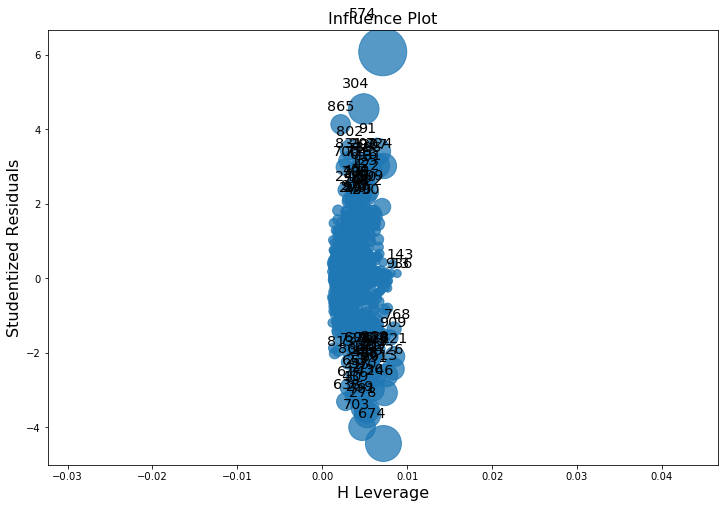

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

# Collinearity

In [40]:
XX = X.dot(X.transpose())
np.linalg.cond(XX)
np.linalg.cond(X)

6.2859225696964369

In [42]:
for ix in range(X.shape[1]):
    print (ix, variance_inflation_factor(X, ix))

0 10.2741205651
1 1.00306052541
2 1.00238631763
3 1.00067348001
